# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [2]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [3]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


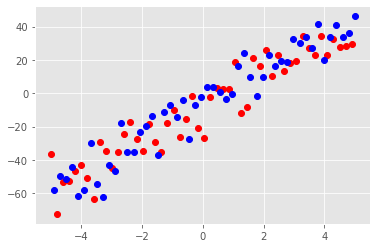

In [4]:
plt.plot(X_train, y_train, linestyle = 'None', marker='o', color='red')
plt.plot(X_test, y_test, linestyle = 'None', marker='o', color='blue')

In [5]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn
class LinearModel():
    def __init__(self):
        self.w = None
        self.b = None
        
    def fit(self, X_train, y_train):
        X = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)
        w = np.linalg.inv(X.T @ X).dot(X.T @ y_train)
        self.w = w[:-1]
        self.b = w[-1]
        
    def predict(self, X):
        return X @ self.w + self.b

In [6]:
def MAE(y_pred, y_real):
    return 1/len(y_pred) * np.sum(np.abs(y_real - y_pred))

def MSE(y_pred, y_real):
    return 1/len(y_pred) * np.sum((y_real - y_pred) ** 2)

In [7]:
def plot(x, y_true, y_pred=None, desc=None):
    plt.plot(x, y_true, linestyle = 'None', marker='o', color='red')
    if y_pred is not None:
        plt.plot(x, y_pred, color='blue')
    if desc is not None:
        plt.suptitle(desc)
    plt.show()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
def print_metrics(y_true, y_pred):
    print(f'Mse:\n    Self-written: {MSE(y_pred, y_true):.4f}\n    Scikit learn: {mean_squared_error(y_pred, y_true):.4f}')
    print(f'Mae:\n    Self-written: {MAE(y_pred, y_true):.4f}\n    Scikit learn: {mean_absolute_error(y_pred, y_true):.4f}')
    

Mse:
    Self-written: 91.1679
    Scikit learn: 91.1679
Mae:
    Self-written: 7.8901
    Scikit learn: 7.8901


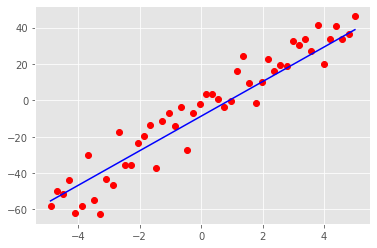

In [10]:
model = LinearModel()
model.fit(X_train, y_train)
y_pred = np.squeeze(model.predict(X_test))

print_metrics(y_test, y_pred)

plot(X_test, y_test, y_pred)

### Sklearn Model

In [11]:
from sklearn.linear_model import LinearRegression

Mse:
    Self-written: 91.1679
    Scikit learn: 91.1679
Mae:
    Self-written: 7.8901
    Scikit learn: 7.8901


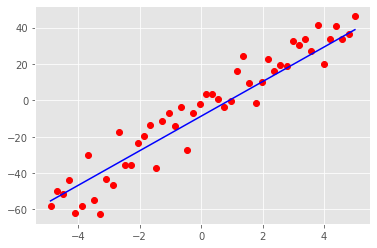

In [12]:
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

y_pred = np.squeeze(sklearn_model.predict(X_test))

print_metrics(y_test, y_pred)

plot(X_test, y_test, y_pred)

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [13]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [14]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

In [15]:
X_train = data['x_train'].reshape((-1, 1))
y_train = data['y_train']

Mse:
    Self-written: 0.2818
    Scikit learn: 0.2818
Mae:
    Self-written: 0.4422
    Scikit learn: 0.4422


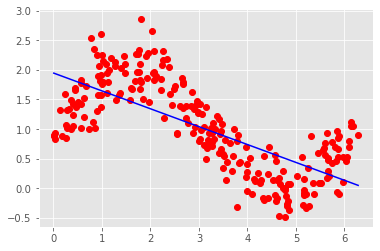

In [16]:
model = LinearModel()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

print_metrics(y_train, y_pred)

plot(X_train, y_train, y_pred)

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from math import inf

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

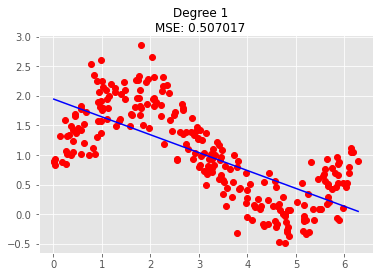

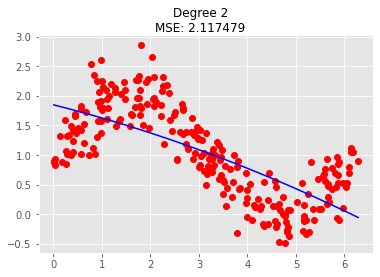

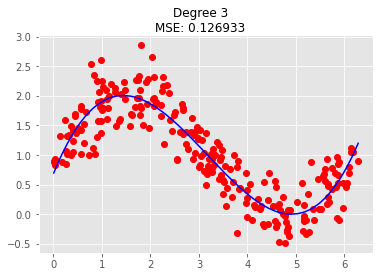

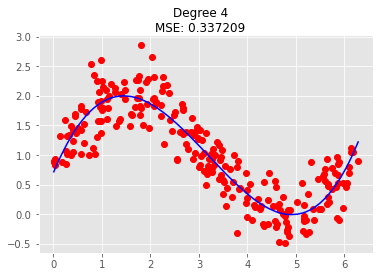

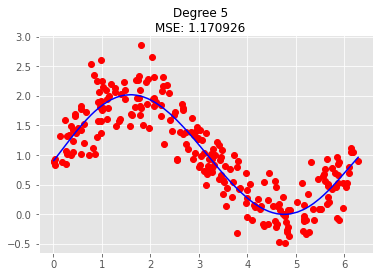

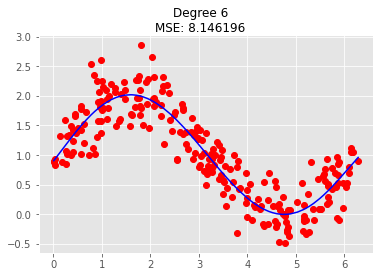

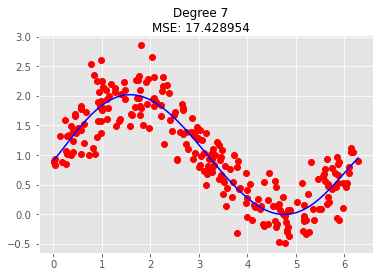

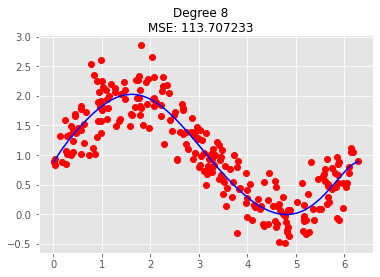

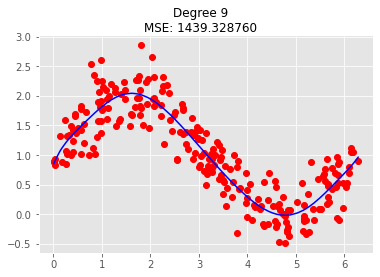

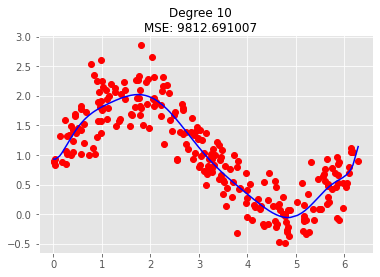

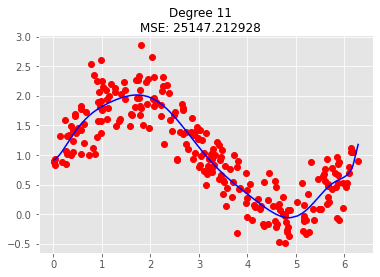

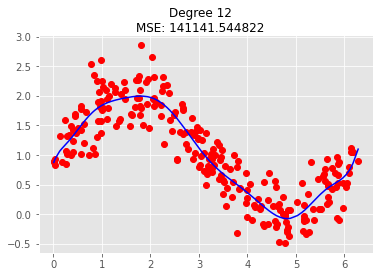

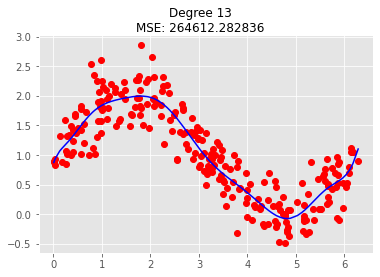

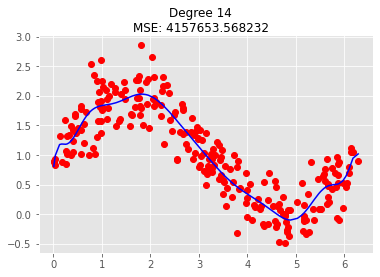

In [18]:
min_score = inf
best_degree = -1
for i in range(1, 15):
    model = make_pipeline(PolynomialFeatures(degree=i), LinearRegression())
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error")
    score = -scores.mean()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    
    if min_score > score:
        min_score = score
        best_degree = i
    
    plot(X_train, y_train, y_pred, desc=f'Degree {i}\nMSE: {score:4f}')


In [19]:
print(f'Best degree:{best_degree}', f'Best MSE: {min_score:.4f}', sep='\n')

Best degree:3
Best MSE: 0.1269


### Вывод

Лучшим полиномои оказался полином со степенью 3.
- Выбрав ролином меньшей степени, мы слишком огранимим модель и она не смодет достаточно точно повторить исходную зависимость.
- Если же мы выберем полином большей степени, то модель начнет переобучаться, т.е. запоминать тестовый набор и отдаляться от исходной зависимости. 

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [20]:
from sklearn.datasets import load_boston
import seaborn as sns

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
house_data = load_boston()

In [23]:
house_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [24]:
df = pd.DataFrame(data=house_data['data'], columns=house_data['feature_names'])
df['target'] = house_data['target']

In [25]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [27]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


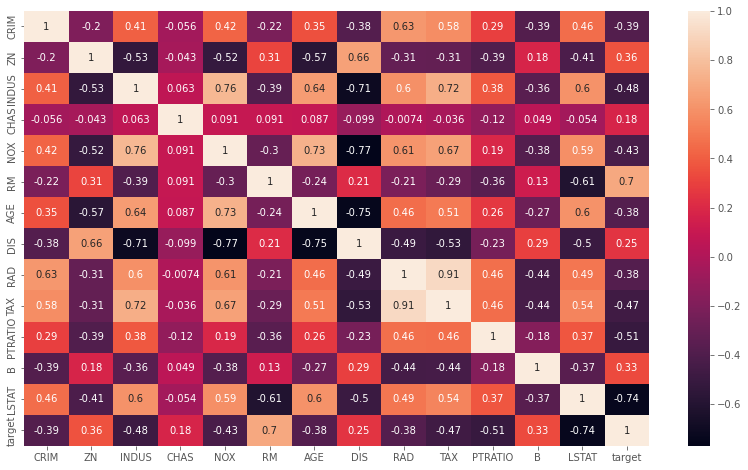

In [28]:
corr = df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True);

## Задание 3.4

In [29]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

In [30]:
df.corr()['target'].abs().sort_values(ascending=False).keys()

Index(['target', 'LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM',
       'RAD', 'AGE', 'ZN', 'B', 'DIS', 'CHAS'],
      dtype='object')

Выберем фичи, которые сильно коррелируют с taget:
- LSTAT
- RM
- PTRATIO
- INDUS
- TAX
- NOX
- CRIM

Уберем из этого списка NOX и TAX из-за высоких корреляция c INDUS

- LSTAT
- RM
- PTRATIO
- INDUS
- CRIM
- RAD
- AGE

Age коррелирует c NOX

- LSTAT
- RM
- PTRATIO
- INDUS
- CRIM
- RAD
- ZN

P.S. corr > 0.7 я считал высокой

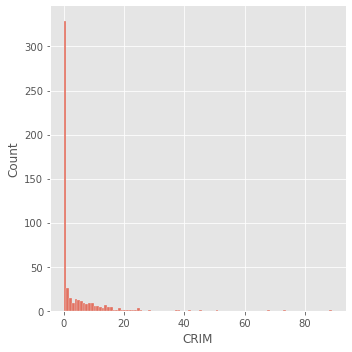

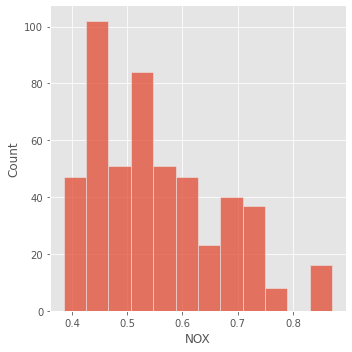

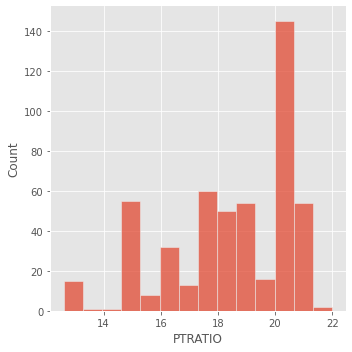

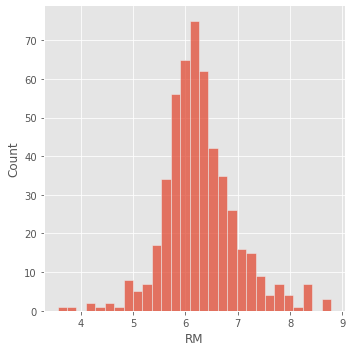

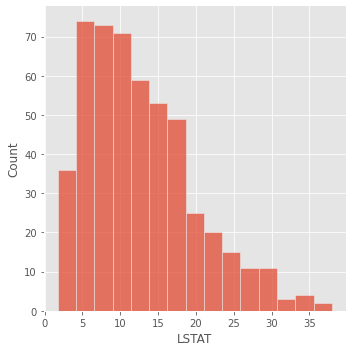

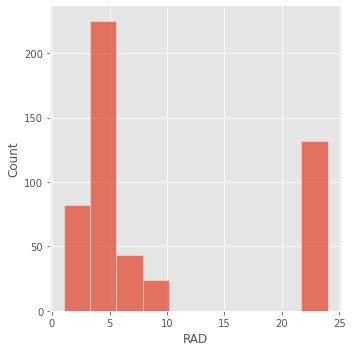

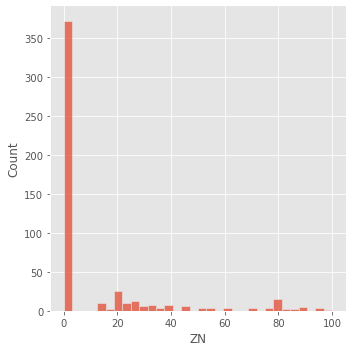

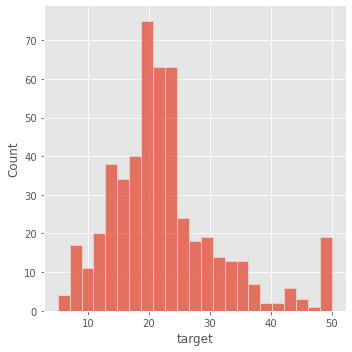

In [31]:
feat = ['CRIM', 'NOX', 'PTRATIO', 'RM', 'LSTAT', 'RAD', 'ZN']
target = 'target'

for i in feat + [target]:
    sns.displot(df[i])

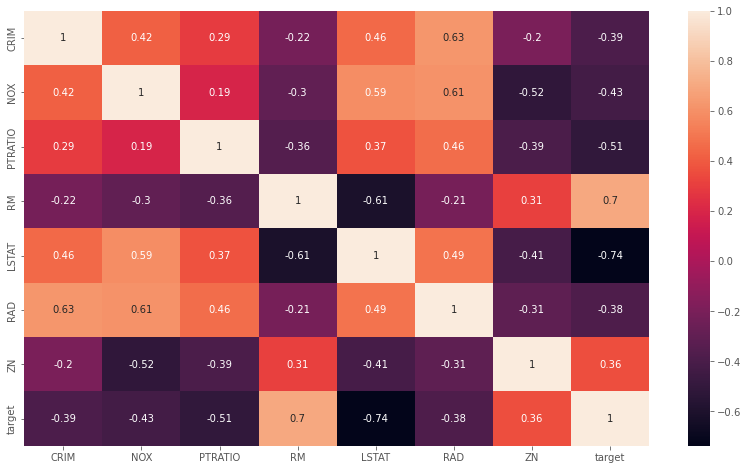

In [32]:
plt.figure(figsize=(14,8))
sns.heatmap(df[feat + [target]].corr(), annot=True);

## Model Training

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import time

### Top7 without corr 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df[feat], df[target], test_size=0.33, random_state=42) 

In [35]:
model = make_pipeline(
    StandardScaler(),
    LinearRegression())

In [36]:
model.fit(X_train, y_train);

In [37]:
y_pred = model.predict(X_test)
print('Усеченный датасет')
print(f'MSE: {mean_squared_error(y_test, y_pred):4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):4f}')

Усеченный датасет
MSE: 24.723124
MAE: 3.495326


In [38]:
#fit benchmark
running_time = 0.0
n = 100
for i in range(n):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    running_time += end - start;

print(f'Avg time: {running_time / n:.4f}')

Avg time: 0.0072


### Full

In [39]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(df.iloc[:, :-1], df[target], test_size=0.33, random_state=42) 

In [40]:
model.fit(X_trainf, y_trainf);

In [41]:
y_pred = model.predict(X_testf)
print('Полный датасет')
print(f'MSE: {mean_squared_error(y_test, y_pred):4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):4f}')

Полный датасет
MSE: 20.724023
MAE: 3.148256


In [42]:
#fit benchmark
running_time = 0.0
n = 100
for i in range(n):
    start = time.time()
    model.fit(X_trainf, y_trainf)
    end = time.time()
    running_time += end - start;

print(f'Avg time: {running_time / n:.4f}')

Avg time: 0.0176


## Вывод

При использовании усеченного датасета было сокращено время обучения, но увеличилась ошибка.

## Для достижения наилучших результатов попробуем полиномиальную регрессию

In [43]:
model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    LinearRegression())

search = GridSearchCV(model, cv=5, n_jobs=14, scoring="neg_mean_squared_error", 
                      param_grid={
                          'polynomialfeatures__degree' : range(0, 10)
                      })

In [44]:
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=14, param_grid={'polynomialfeatures__degree': range(0, 10)},
             scoring='neg_mean_squared_error')

In [45]:
model = search.best_estimator_
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'Degree: {search.best_params_["polynomialfeatures__degree"]}')
print(f'MSE:    {mean_squared_error(y_test, y_pred):4f}')
print(f'MAE:    {mean_absolute_error(y_test, y_pred):4f}')

Degree: 2
MSE:    17.850532
MAE:    2.851870
